<a href="https://colab.research.google.com/github/alexander-toschev/cv-course/blob/main/ImageProcessing_Morphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install matplotlib
!pip install Pillow
!pip install image
!apt update
!apt install -y cmake
!pip install dlib
!wget "https://github.com/nicolasmetallo/eameo-faceswap-generator/raw/master/shape_predictor_68_face_landmarks.dat"
!wget https://github.com/alexander-toschev/cv-course/raw/main/data/donald_trump.jpg
!wget https://github.com/alexander-toschev/cv-course/raw/main/data/hillary_clinton.jpg
!wget https://github.com/alexander-toschev/cv-course/raw/main/data/face-align-steps-768x341.jpg

     |████████████████████████████████| 1.7 MB 12.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 7.9 MB 12.2 MB/s            
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19494 sha256=2a8aa96826b3190be83b252ad72c05f58df3dc7d2a95a00689f64460f04082a2
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built image
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/deadsnakes/pp

In [6]:
!wget "https://github.com/nicolasmetallo/eameo-faceswap-generator/raw/master/shape_predictor_68_face_landmarks.dat"

--2023-04-04 18:17:26--  https://github.com/nicolasmetallo/eameo-faceswap-generator/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nicolasmetallo/eameo-faceswap-generator/master/shape_predictor_68_face_landmarks.dat [following]
--2023-04-04 18:17:27--  https://raw.githubusercontent.com/nicolasmetallo/eameo-faceswap-generator/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[=============

In [11]:
!wget https://github.com/alexander-toschev/cv-course/raw/main/data/donald_trump.jpg
!wget https://github.com/alexander-toschev/cv-course/raw/main/data/hillary_clinton.jpg
!wget https://github.com/alexander-toschev/cv-course/raw/main/data/face-align-steps-768x341.jpg

--2023-04-04 18:19:00--  https://github.com/alexander-toschev/cv-course/raw/main/data/donald_trump.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexander-toschev/cv-course/main/data/donald_trump.jpg [following]
--2023-04-04 18:19:00--  https://raw.githubusercontent.com/alexander-toschev/cv-course/main/data/donald_trump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462025 (451K) [image/jpeg]
Saving to: ‘donald_trump.jpg’

donald_trump.jpg    100%[===================>] 451,20K  2,54MB/s    in 0,2s    

2023-04-04 18:19:01 (2,54 MB/s) - ‘donald_trump.jpg’ saved [462025/462025]

--2023-

# Замена лиц

**Цель**

Посмотреть алгоритмы замены лиц

## Theory

![Figure3](https://github.com/alexander-toschev/cv-course/raw/main/data/face-align-steps-768x341.jpg)



1. **Face Alignment** : To replace one face with another, we first need place one face approximately on top of the other so that it covers the face below.

2. **Facial Landmark** Detection The geometry of the two faces are very different and so we need  to warp the source face a bit so that it covers the target face, but we also want to make sure we do not warp it beyond recognition.To achieve this we first detect facial landmarks on both images using dlib. However, unlike in Face Morphing, we do not and should not use all the points for face alignment. We simply need the points on the outer boundary of the face as show in the image.

3. **Find Convex Hull** In Computer Vision and Math jargon, the boundary of a collection of points or shape is called a “hull”. A boundary that does not have any concavities is called a “Convex Hull”. In Figure 3. the image on the left shows facial landmarks detected using dlib in red and the convex hull of the points is shown in blue. The convex hull of a set of points can be calculated using OpenCV’s convexHull function.

4. **Delaunay Triangulation** The next step in alignment is to do a Delaunay triangulation of the points on the convex hull. The triangulation is shown in the middle image in Figure 3. This allows us to divide the face into smaller parts. My previous post that explains Delaunay triangulation in detail can be found here

5. **Affine warp** triangles The final steps of face alignment to to consider corresponding triangles between the source face and the target face, and affine warp the source face triangle onto the target face. More details can be found in my post about Face Morphing. However, as you can see in the right image of Figure 3, aligning the face and slapping one face on top of the other hardly looks unnatural. The seams are visible because of lighting and skin tone differences between the two images. The next step shows how to seamlessly combine the two images.

6. **Seamles cloning** It is a feature in OpenCV 3 that allows you to seamlessly clone parts of the source image ( identified by a mask ) onto a destination image.
Poisson Image Editing
Seamless cloning in OpenCV is an implementation of an influential SIGGRAPH 2003 paper titled “Poisson Image Editing”, by Patrick Perez, Michel Gangnet, and Andrew Blake. http://www.irisa.fr/vista/Papers/2003_siggraph_perez.pdf

_Using generic interpolation machinery based on solving Poisson
equations, a variety of novel tools are introduced for seamless editing of image regions. The first set of tools permits the seamless
importation of both opaque and transparent source image regions
into a destination region. The second set is based on similar mathematical ideas and allows the user to modify the appearance of the
image seamlessly, within a selected region. These changes can be
arranged to affect the texture, the illumination, and the color of objects lying in the region, or to make tileable a rectangular selection._

Now we know that if we blend the intensities ( RGB values ) of the source image ( the airplane ) with the destination image ( sky ) using a carefully created mask we will obtain a result like Figure 3. The central insight in the paper is that working with image gradients instead of image intensities can produce much more realistic results. After seamless cloning the intensity of the result image in the masked region is NOT the same as the intensity of the source region in the masked region. Instead, the gradient of the result image in the masked region is about the same as the gradient of the source region in the masked region. Additionally, the intensity of the result image at the boundary of the masked region is the same as the intensity of the destination image (sky).

The authors show that this is done by solving a Poisson equation, and hence the title of the paper — Poisson Image Editing. The theoretical and implementation details of the paper are actually very cool, but beyond the scope of this post. However, if you read the paper and have questions, feel free to ask them in the comments section.

In [7]:
import numpy as np
import cv2
import sys
from PIL import Image
import cv2
import numpy as np
import math
import dlib

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:


# Returns 8 points on the boundary of a rectangle
def getEightBoundaryPoints(h, w):
  boundaryPts = []
  boundaryPts.append((0,0))
  boundaryPts.append((w/2, 0))
  boundaryPts.append((w-1,0))
  boundaryPts.append((w-1, h/2))
  boundaryPts.append((w-1, h-1))
  boundaryPts.append((w/2, h-1))
  boundaryPts.append((0, h-1))
  boundaryPts.append((0, h/2))
  return np.array(boundaryPts, dtype=np.float)


# Constrains points to be inside boundary
def constrainPoint(p, w, h):
  p = (min(max(p[0], 0), w - 1), min(max(p[1], 0), h - 1))
  return p

# convert Dlib shape detector object to list of tuples
def dlibLandmarksToPoints(shape):
  points = []
  for p in shape.parts():
    pt = (p.x, p.y)
    points.append(pt)
  return points

# Compute similarity transform given two sets of two points.
# OpenCV requires 3 pairs of corresponding points.
# We are faking the third one.
def similarityTransform(inPoints, outPoints):
  s60 = math.sin(60*math.pi/180)
  c60 = math.cos(60*math.pi/180)

  inPts = np.copy(inPoints).tolist()
  outPts = np.copy(outPoints).tolist()

  # The third point is calculated so that the three points make an equilateral triangle
  xin = c60*(inPts[0][0] - inPts[1][0]) - s60*(inPts[0][1] - inPts[1][1]) + inPts[1][0]
  yin = s60*(inPts[0][0] - inPts[1][0]) + c60*(inPts[0][1] - inPts[1][1]) + inPts[1][1]

  inPts.append([np.int(xin), np.int(yin)])

  xout = c60*(outPts[0][0] - outPts[1][0]) - s60*(outPts[0][1] - outPts[1][1]) + outPts[1][0]
  yout = s60*(outPts[0][0] - outPts[1][0]) + c60*(outPts[0][1] - outPts[1][1]) + outPts[1][1]

  outPts.append([np.int(xout), np.int(yout)])

  # Now we can use estimateRigidTransform for calculating the similarity transform.
  tform = cv2.estimateRigidTransform(np.array([inPts]), np.array([outPts]), False)
  return tform

# Normalizes a facial image to a standard size given by outSize.
# Normalization is done based on Dlib's landmark points passed as pointsIn
# After normalization, left corner of the left eye is at (0.3 * w, h/3 )
# and right corner of the right eye is at ( 0.7 * w, h / 3) where w and h
# are the width and height of outSize.
def normalizeImagesAndLandmarks(outSize, imIn, pointsIn):
  h, w = outSize

  # Corners of the eye in input image
  eyecornerSrc = [pointsIn[36], pointsIn[45]]

  # Corners of the eye in normalized image
  eyecornerDst = [(np.int(0.3 * w), np.int(h/3)), 
                  (np.int(0.7 * w), np.int(h/3))]

  # Calculate similarity transform
  tform = similarityTransform(eyecornerSrc, eyecornerDst)
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Apply similarity transform to input image
  imOut = cv2.warpAffine(imIn, tform, (w, h))

  # reshape pointsIn from numLandmarks x 2 to numLandmarks x 1 x 2
  points2 = np.reshape(pointsIn, (pointsIn.shape[0], 1, pointsIn.shape[1]))
  
  # Apply similarity transform to landmarks
  pointsOut = cv2.transform(points2, tform)

  # reshape pointsOut to numLandmarks x 2
  pointsOut = np.reshape(pointsOut, (pointsIn.shape[0], pointsIn.shape[1]))

  return imOut, pointsOut

# find the point closest to an array of points
# pointsArray is a Nx2 and point is 1x2 ndarray
def findIndex(pointsArray, point):
  dist = np.linalg.norm(pointsArray-point, axis=1)
  minIndex = np.argmin(dist)
  return minIndex


# Check if a point is inside a rectangle
def rectContains(rect, point):
  if point[0] < rect[0]:
    return False
  elif point[1] < rect[1]:
    return False
  elif point[0] > rect[2]:
    return False
  elif point[1] > rect[3]:
    return False
  return True


# Calculate Delaunay triangles for set of points
# Returns the vector of indices of 3 points for each triangle
def calculateDelaunayTriangles(rect, points):

  # Create an instance of Subdiv2D
  subdiv = cv2.Subdiv2D(rect)

  # Insert points into subdiv
  for p in points:
    subdiv.insert((p[0], p[1]))

  # Get Delaunay triangulation
  triangleList = subdiv.getTriangleList()

  # Find the indices of triangles in the points array
  delaunayTri = []

  for t in triangleList:
    # The triangle returned by getTriangleList is
    # a list of 6 coordinates of the 3 points in
    # x1, y1, x2, y2, x3, y3 format.
    # Store triangle as a list of three points
    pt = []
    pt.append((t[0], t[1]))
    pt.append((t[2], t[3]))
    pt.append((t[4], t[5]))

    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])

    if rectContains(rect, pt1) and rectContains(rect, pt2) and rectContains(rect, pt3):
      # Variable to store a triangle as indices from list of points
      ind = []
      # Find the index of each vertex in the points list
      for j in range(0, 3):
        for k in range(0, len(points)):
          if(abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
            ind.append(k)
        # Store triangulation as a list of indices
      if len(ind) == 3:
        delaunayTri.append((ind[0], ind[1], ind[2]))

  return delaunayTri

# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size):

  # Given a pair of triangles, find the affine transform.
  warpMat = cv2.getAffineTransform(np.float32(srcTri), np.float32(dstTri))

  # Apply the Affine Transform just found to the src image
  dst = cv2.warpAffine(src, warpMat, (size[0], size[1]), None,
             flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

  return dst

# Warps and alpha blends triangular regions from img1 and img2 to img
def warpTriangle(img1, img2, t1, t2):
  # Find bounding rectangle for each triangle
  r1 = cv2.boundingRect(np.float32([t1]))
  r2 = cv2.boundingRect(np.float32([t2]))

  # Offset points by left top corner of the respective rectangles
  t1Rect = []
  t2Rect = []
  t2RectInt = []

  for i in range(0, 3):
    t1Rect.append(((t1[i][0] - r1[0]), (t1[i][1] - r1[1])))
    t2Rect.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))
    t2RectInt.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))

  # Get mask by filling triangle
  mask = np.zeros((r2[3], r2[2], 3), dtype=np.float32)
  cv2.fillConvexPoly(mask, np.int32(t2RectInt), (1.0, 1.0, 1.0), 16, 0)

  # Apply warpImage to small rectangular patches
  img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]

  size = (r2[2], r2[3])

  img2Rect = applyAffineTransform(img1Rect, t1Rect, t2Rect, size)

  img2Rect = img2Rect * mask

  # Copy triangular region of the rectangular patch to the output image
  img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ((1.0, 1.0, 1.0) - mask)
  img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] + img2Rect

# detect facial landmarks in image
def getLandmarks(faceDetector, landmarkDetector, im, FACE_DOWNSAMPLE_RATIO = 1):
  points = []
  imSmall = cv2.resize(im,None,
                       fx=1.0/FACE_DOWNSAMPLE_RATIO, 
                       fy=1.0/FACE_DOWNSAMPLE_RATIO, 
                       interpolation = cv2.INTER_LINEAR)
  
  faceRects = faceDetector(imSmall, 0)
  
  if len(faceRects) > 0:
    maxArea = 0
    maxRect = None
    # TODO: test on images with multiple faces
    for face in faceRects:
      if face.area() > maxArea:
        maxArea = face.area()
        maxRect = [face.left(),
                   face.top(),
                   face.right(),
                   face.bottom()
                  ]
    
    rect = dlib.rectangle(*maxRect)
    scaledRect = dlib.rectangle(int(rect.left()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.top()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.right()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.bottom()*FACE_DOWNSAMPLE_RATIO))
    
    landmarks = landmarkDetector(im, scaledRect)
    points = dlibLandmarksToPoints(landmarks)
  return points

# Warps an image in a piecewise affine manner.
# The warp is defined by the movement of landmark points specified by pointsIn
# to a new location specified by pointsOut. The triangulation beween points is specified
# by their indices in delaunayTri.
def warpImage(imIn, pointsIn, pointsOut, delaunayTri):
  h, w, ch = imIn.shape
  # Output image
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Warp each input triangle to output triangle.
  # The triangulation is specified by delaunayTri
  for j in range(0, len(delaunayTri)):
    # Input and output points corresponding to jth triangle
    tin = []
    tout = []

    for k in range(0, 3):
      # Extract a vertex of input triangle
      pIn = pointsIn[delaunayTri[j][k]]
      # Make sure the vertex is inside the image.
      pIn = constrainPoint(pIn, w, h)

      # Extract a vertex of the output triangle
      pOut = pointsOut[delaunayTri[j][k]]
      # Make sure the vertex is inside the image.
      pOut = constrainPoint(pOut, w, h)

      # Push the input vertex into input triangle
      tin.append(pIn)
      # Push the output vertex into output triangle
      tout.append(pOut)

    # Warp pixels inside input triangle to output triangle.
    warpTriangle(imIn, imOut, tin, tout)
  return imOut

# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 4, color, cv2.FILLED, cv2.LINE_AA, 0 )

    # Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True


# Draw delaunay triangles
def draw_delaunay(img, triangleList, points, delaunay_color ) :
  
    size = img.shape
    r = (0, 0, size[1], size[0])

    for t in triangleList :
        pt1 = points[t[0]]
        pt2 = points[t[1]]
        pt3 = points[t[2]]
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
        
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

## Facial Landmark 

In [12]:
from skimage import io
# !ls
filename1 = "donald_trump.jpg"
filename2 = "hillary_clinton.jpg"

alpha = 0.5
    
# Read images
img1 = cv2.imread(filename1,1);
img2 = cv2.imread(filename2,1);
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
points1 = getLandmarks(detector, predictor, img1)
print(points1)
points2 = getLandmarks(detector, predictor, img2)

[(84, 314), (84, 360), (87, 408), (92, 456), (101, 503), (119, 548), (149, 583), (185, 608), (231, 617), (283, 610), (338, 589), (391, 565), (433, 527), (462, 483), (477, 433), (483, 379), (489, 325), (107, 262), (124, 240), (153, 235), (183, 242), (213, 254), (277, 260), (313, 247), (351, 242), (387, 251), (415, 275), (241, 300), (237, 328), (233, 355), (229, 384), (203, 419), (217, 424), (232, 428), (251, 426), (271, 422), (141, 302), (159, 292), (182, 293), (198, 310), (179, 313), (157, 311), (308, 313), (329, 299), (353, 298), (373, 310), (353, 318), (330, 317), (177, 503), (196, 484), (217, 472), (231, 477), (246, 474), (273, 489), (302, 510), (273, 525), (246, 530), (230, 529), (214, 526), (194, 517), (190, 500), (217, 489), (232, 491), (247, 491), (289, 506), (246, 509), (231, 508), (215, 505)]


## Delaunay Triangulation & convex hull

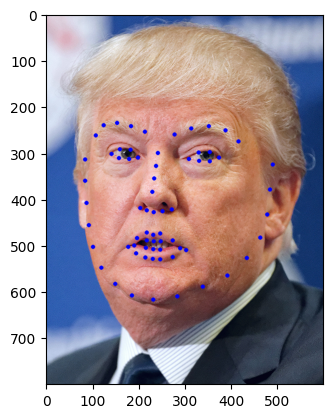

In [13]:
draw_img = np.copy(img1)

for t in points1 :
    draw_point(draw_img, t, (255,0,0))

plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))

### Exercise 1

Please plot together image 1 and image 2 dots in a row.


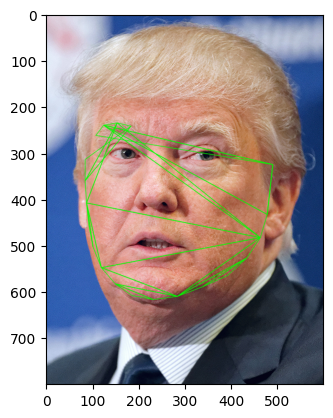

In [14]:
# Find convex hull
# выпуклая оболочка
hull1 = []
hull2 = []

hullIndex = cv2.convexHull(np.array(points2), returnPoints = False)
          
for i in range(0, len(hullIndex)):
    hull1.append(points1[int(hullIndex[i])])
    hull2.append(points2[int(hullIndex[i])])
    
    
# Find delanauy traingulation for convex hull points
sizeImg2 = img2.shape    
rect = (0, 0, sizeImg2[1], sizeImg2[0])
dt = calculateDelaunayTriangles(rect, hull2)
draw =  np.copy(img1)
draw_delaunay(draw,  dt, points1, (0,255,0))
plt.imshow(cv2.cvtColor(draw, cv2.COLOR_BGR2RGB))

### Exercise 2
Plot triangles also on 2nd image and put in a row

## Warp and seamless clonning

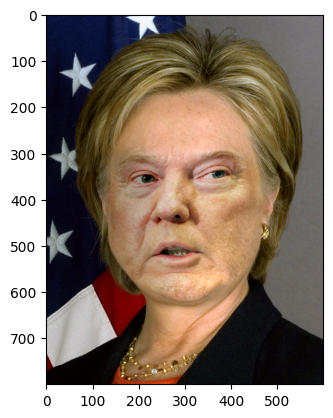

In [15]:
img1Warped = np.copy(img2);    
# Apply affine transformation to Delaunay triangles
for i in range(0, len(dt)):
    t1 = []
    t2 = []        
#get points for img1, img2 corresponding to the triangles
    for j in range(0, 3):
       t1.append(hull1[dt[i][j]])
       t2.append(hull2[dt[i][j]])
       
    warpTriangle(img1, img1Warped, t1, t2)   
    
            
# Calculate Mask
hull8U = []
for i in range(0, len(hull2)):
    hull8U.append((hull2[i][0], hull2[i][1]))
    
mask = np.zeros(img2.shape, dtype = img2.dtype)  
    
cv2.fillConvexPoly(mask, np.int32(hull8U), (255, 255, 255))
    
r = cv2.boundingRect(np.float32([hull2]))    
    
center = ((r[0]+int(r[2]/2), r[1]+int(r[3]/2)))
        
    
# Clone seamlessly.
output = cv2.seamlessClone(np.uint8(img1Warped), img2, mask, center, cv2.NORMAL_CLONE)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    